In [ ]:
#| default_exp streamlit.index_st

{'lat_lon': (40.7128, -74.006), 'time_zone': 'America/New_York', 'local_peak_start': '2024-03-21 10:00:00', 'local_peak_end': '2024-03-21 17:00:00'}
{'lat_lon': (28.6139, 77.209), 'time_zone': 'Asia/Kolkata', 'local_peak_start': '2024-03-21 19:30:00', 'local_peak_end': '2024-03-22 02:30:00'}
Timezone offset for latitude 40.7128, longitude -74.006 is -4.0 hours.


# Forecast Actions

> Trigger actions based on forecast

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#| export
from fcst_action.core import *

This file will become your README and also the index of your documentation.

In [ ]:
### Get campaign details

In [ ]:
#| export
company_df, campaigns_df = get_campaign_details()
company_list = company_df['Company'].tolist()

In [ ]:
#| export
import streamlit as st
from streamlit_jupyter import StreamlitPatcher, tqdm

In [ ]:
#| export
StreamlitPatcher().jupyter()  # register streamlit with jupyter-compatible wrappers

In [ ]:
#| export
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
#| export
st.title("Forecast Actions")

# Forecast Actions

### Extract the city level campaign info

In [ ]:
#| export 
company_sel = st.selectbox('Select a company', company_list)

Dropdown(description='Select a company', options=('TreEscape', 'BigAssFans', 'Dolphinarium', 'AmnetIndia'), va…

In [ ]:
#| export
col1, col2 = st.columns(2)
with col1:
    lead_sel = st.selectbox('Forecast Lead',list(range(0,11)),index=False)
with col2:
    look_back_days = st.selectbox('Look back',list(range(0,90)))

Dropdown(description='Forecast Lead', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=0)

Dropdown(description='Look back', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1…

In [ ]:
company_sel, lead_sel, look_back_days

('TreEscape', 0, 0)

In [ ]:
#| export
city_res_df, city_locations = get_campaign_hist(company_df, campaigns_df, company_sel = company_sel, lead_days=lead_sel, recent_days=look_back_days)
comp_row = company_df[company_df['Company']==company_sel].iloc[-1,:]
out_story = print_campaign_story(comp_row)

TreEscape is in the OutdoorAdventure business operating in Jersey City, NJ
Here is some additional background
automated weather-based rules to activate their ‘sunny’ ad set (on Meta) and ad group (on Display) when the forecast was sunny over a 3-day window. The rolling 3-day forecast was updated several times per day based on latest weather data.

When the forecast looked positive, WeatherAds would turn on the associated ads in Google and Meta. The ad copy also used the forecast as a hook to drive bookings for TreEscape. The tagline read “looks like sun, looks like fun!”


In [ ]:
#| export
for story in out_story:
    st.write(story)
st.dataframe(city_res_df.head(10))

TreEscape is in the OutdoorAdventure business operating in Jersey City, NJ

Here is some additional background

automated weather-based rules to activate their ‘sunny’ ad set (on Meta) and ad group (on Display) when the forecast was sunny over a 3-day window. The rolling 3-day forecast was updated several times per day based on latest weather data.

When the forecast looked positive, WeatherAds would turn on the associated ads in Google and Meta. The ad copy also used the forecast as a hook to drive bookings for TreEscape. The tagline read “looks like sun, looks like fun!”

,creation_time,"Jersey City, NJ"
0,2023-06-01 00:00:00,LooklikeSunFun
1,2023-06-01 06:00:00,LooklikeSunFun
2,2023-06-01 12:00:00,LooklikeSunFun
3,2023-06-01 18:00:00,LooklikeSunFun
4,2023-06-02 00:00:00,None
5,2023-06-02 06:00:00,None
6,2023-06-02 12:00:00,None
7,2023-06-02 18:00:00,LooklikeSunFun
8,2023-06-03 00:00:00,None
9,2023-06-03 06:00:00,None


### Plot a heatmap by city

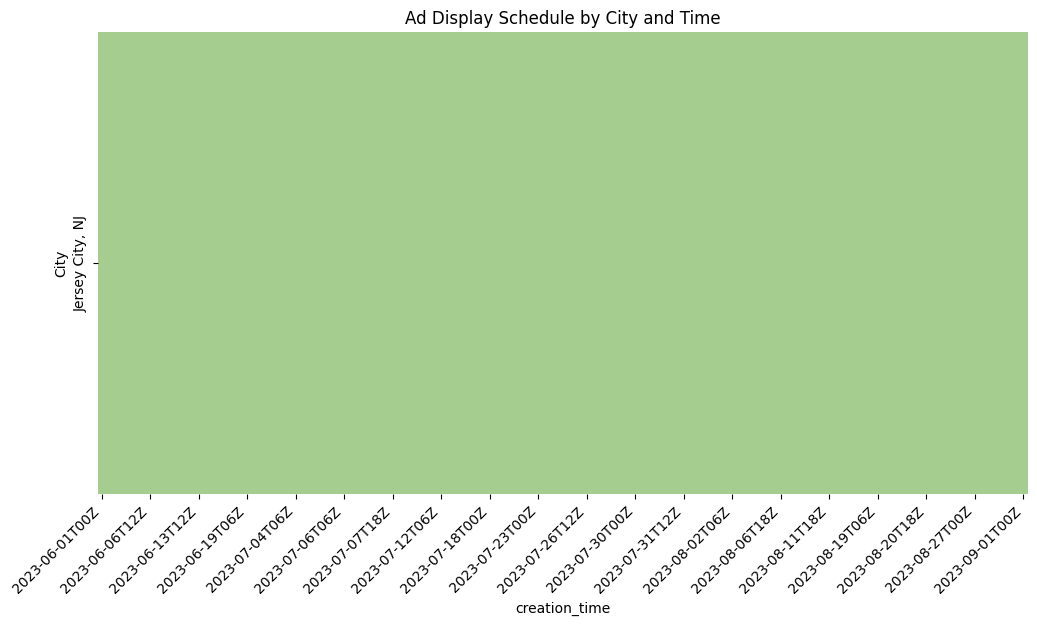

DeltaGenerator()

In [ ]:
#| export
st.pyplot(campaign_heatmap(city_res_df))

### Save a map of campaign signals

In [ ]:
#| export
map_campaigns_by_day(city_res_df,city_locations)

Map saved to ads_over_time.html


### Summary stats of # of Ads of each type by City
#### of days campaign is run and % of time

In [ ]:
#| export
if not look_back_days or look_back_days > 5:
    summary_stats = get_campaign_summary(city_res_df)
    st.write("Summary Stats")
    # Convert dictionary to DataFrame
    df = pd.DataFrame.from_dict({(i, j): summary_stats[i][j] 
                                for i in summary_stats.keys() 
                                for j in summary_stats[i].keys()}, orient='columns')

    # Format the Percentage column to display as percentage
    df['Percentage of total time'] = df['Percentage of total time'].map(lambda x: f"{x:.2f}%")

    # Round the Duration column to the nearest integer
    df['Duration (in hours)'] = df['Duration (in hours)'].round()

    # Transpose the DataFrame
    df = df.T
    display(df)
    st.table(df)

Summary Stats

,,LooklikeSunFun
Duration (in hours),"Jersey City, NJ",28 days 12:00:00
Percentage of total time,"Jersey City, NJ",30.98%


2024-03-21 16:22:56.837 Serialization of dataframe to Arrow table was unsuccessful due to: ("object of type <class 'str'> cannot be converted to int", 'Conversion failed for column LooklikeSunFun with type object'). Applying automatic fixes for column types to make the dataframe Arrow-compatible.


In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()